## Import the data from the roads which need to be checked for crossings with the N1 and N2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from haversine import haversine, Unit

In [2]:
remaining_roads = pd.read_csv('../data/semi-processed/possible_crossings_to_check.csv')
remaining_roads

,Unnamed: 0,road,chainage,LRPName,lat,lon,gap,type,name
0,0,N1,0.000,LRPS,23.706028,90.443333,NaN,Others,Start of Road after Jatrabari Flyover infront...
1,1,N1,0.814,LRPSa,23.702917,90.450417,NaN,Culvert,Box Culvert
2,2,N1,0.822,LRPSb,23.702778,90.450472,NaN,CrossRoad,Intersection with Z1101
3,3,N1,1.000,LRP001,23.702139,90.451972,NaN,KmPost,Km post missing
4,4,N1,2.000,LRP002,23.697889,90.460583,NaN,KmPost,Km post missing
...,...,...,...,...,...,...,...,...,...
29982,51269,Z8913,23.000,LRP023,22.360750,90.832777,NaN,KmPost,Km post missing
29983,51270,Z8913,23.088,LRP023a,22.361500,90.832833,NaN,Culvert,Sluice gate
29984,51271,Z8913,24.000,LRP024,22.368916,90.836639,NaN,KmPost,Km post missing
29985,51272,Z8913,25.000,LRP025,22.377305,90.839972,NaN,KmPost,Km post Missing


In [3]:
# Make a list of the remaining roads
remaining_roads_list = list(set(remaining_roads.road.to_list()))
remaining_roads_list

['Z8033',
 'Z7604',
 'R250',
 'Z3707',
 'R880',
 'Z5613',
 'Z7707',
 'Z7615',
 'Z5552',
 'N1',
 'Z5624',
 'Z5001',
 'Z8814',
 'R114',
 'R313',
 'Z7461',
 'R850',
 'Z4607',
 'R890',
 'Z5703',
 'Z7057',
 'Z7617',
 'Z2802',
 'R748',
 'R820',
 'Z5621',
 'Z7001',
 'Z3024',
 'Z3711',
 'N208',
 'R601',
 'Z4018',
 'Z5509',
 'Z5046',
 'Z6813',
 'Z7553',
 'Z8065',
 'Z7004',
 'Z5456',
 'N2',
 'N709',
 'Z7024',
 'Z7710',
 'R162',
 'R370',
 'Z5452',
 'Z6809',
 'N506',
 'Z1429',
 'Z2003',
 'Z5622',
 'Z5018',
 'Z7102',
 'Z5075',
 'Z7701',
 'N7',
 'Z3701',
 'Z7023',
 'Z4021',
 'Z8037',
 'Z7405',
 'R160',
 'Z1412',
 'Z5049',
 'N5',
 'R710',
 'R604',
 'Z6802',
 'Z5072',
 'Z2807',
 'N3',
 'R749',
 'Z1422',
 'R161',
 'Z1603',
 'R550',
 'Z1612',
 'R881',
 'Z7106',
 'Z8032',
 'Z1610',
 'Z8044',
 'R312',
 'Z3601',
 'Z7008',
 'Z7040',
 'R747',
 'Z7610',
 'Z5706',
 'N502',
 'R544',
 'Z3037',
 'Z7704',
 'Z8040',
 'Z1424',
 'Z6004',
 'Z1813',
 'Z4022',
 'Z8603',
 'Z6855',
 'Z7606',
 'N405',
 'R755',
 'Z2002',
 '

In [4]:
# Convert the road lists into a nested list 
remaining_roads_nested = [remaining_roads_list[i:i+6] for i in range(0, len(remaining_roads_list), 6)]
remaining_roads_nested

[['Z8033', 'Z7604', 'R250', 'Z3707', 'R880', 'Z5613'],
 ['Z7707', 'Z7615', 'Z5552', 'N1', 'Z5624', 'Z5001'],
 ['Z8814', 'R114', 'R313', 'Z7461', 'R850', 'Z4607'],
 ['R890', 'Z5703', 'Z7057', 'Z7617', 'Z2802', 'R748'],
 ['R820', 'Z5621', 'Z7001', 'Z3024', 'Z3711', 'N208'],
 ['R601', 'Z4018', 'Z5509', 'Z5046', 'Z6813', 'Z7553'],
 ['Z8065', 'Z7004', 'Z5456', 'N2', 'N709', 'Z7024'],
 ['Z7710', 'R162', 'R370', 'Z5452', 'Z6809', 'N506'],
 ['Z1429', 'Z2003', 'Z5622', 'Z5018', 'Z7102', 'Z5075'],
 ['Z7701', 'N7', 'Z3701', 'Z7023', 'Z4021', 'Z8037'],
 ['Z7405', 'R160', 'Z1412', 'Z5049', 'N5', 'R710'],
 ['R604', 'Z6802', 'Z5072', 'Z2807', 'N3', 'R749'],
 ['Z1422', 'R161', 'Z1603', 'R550', 'Z1612', 'R881'],
 ['Z7106', 'Z8032', 'Z1610', 'Z8044', 'R312', 'Z3601'],
 ['Z7008', 'Z7040', 'R747', 'Z7610', 'Z5706', 'N502'],
 ['R544', 'Z3037', 'Z7704', 'Z8040', 'Z1424', 'Z6004'],
 ['Z1813', 'Z4022', 'Z8603', 'Z6855', 'Z7606', 'N405'],
 ['R755', 'Z2002', 'N806', 'Z6856', 'N8', 'Z7702'],
 ['N401', 'Z5856', '

In [5]:
# len(remaining_roads_list)/6

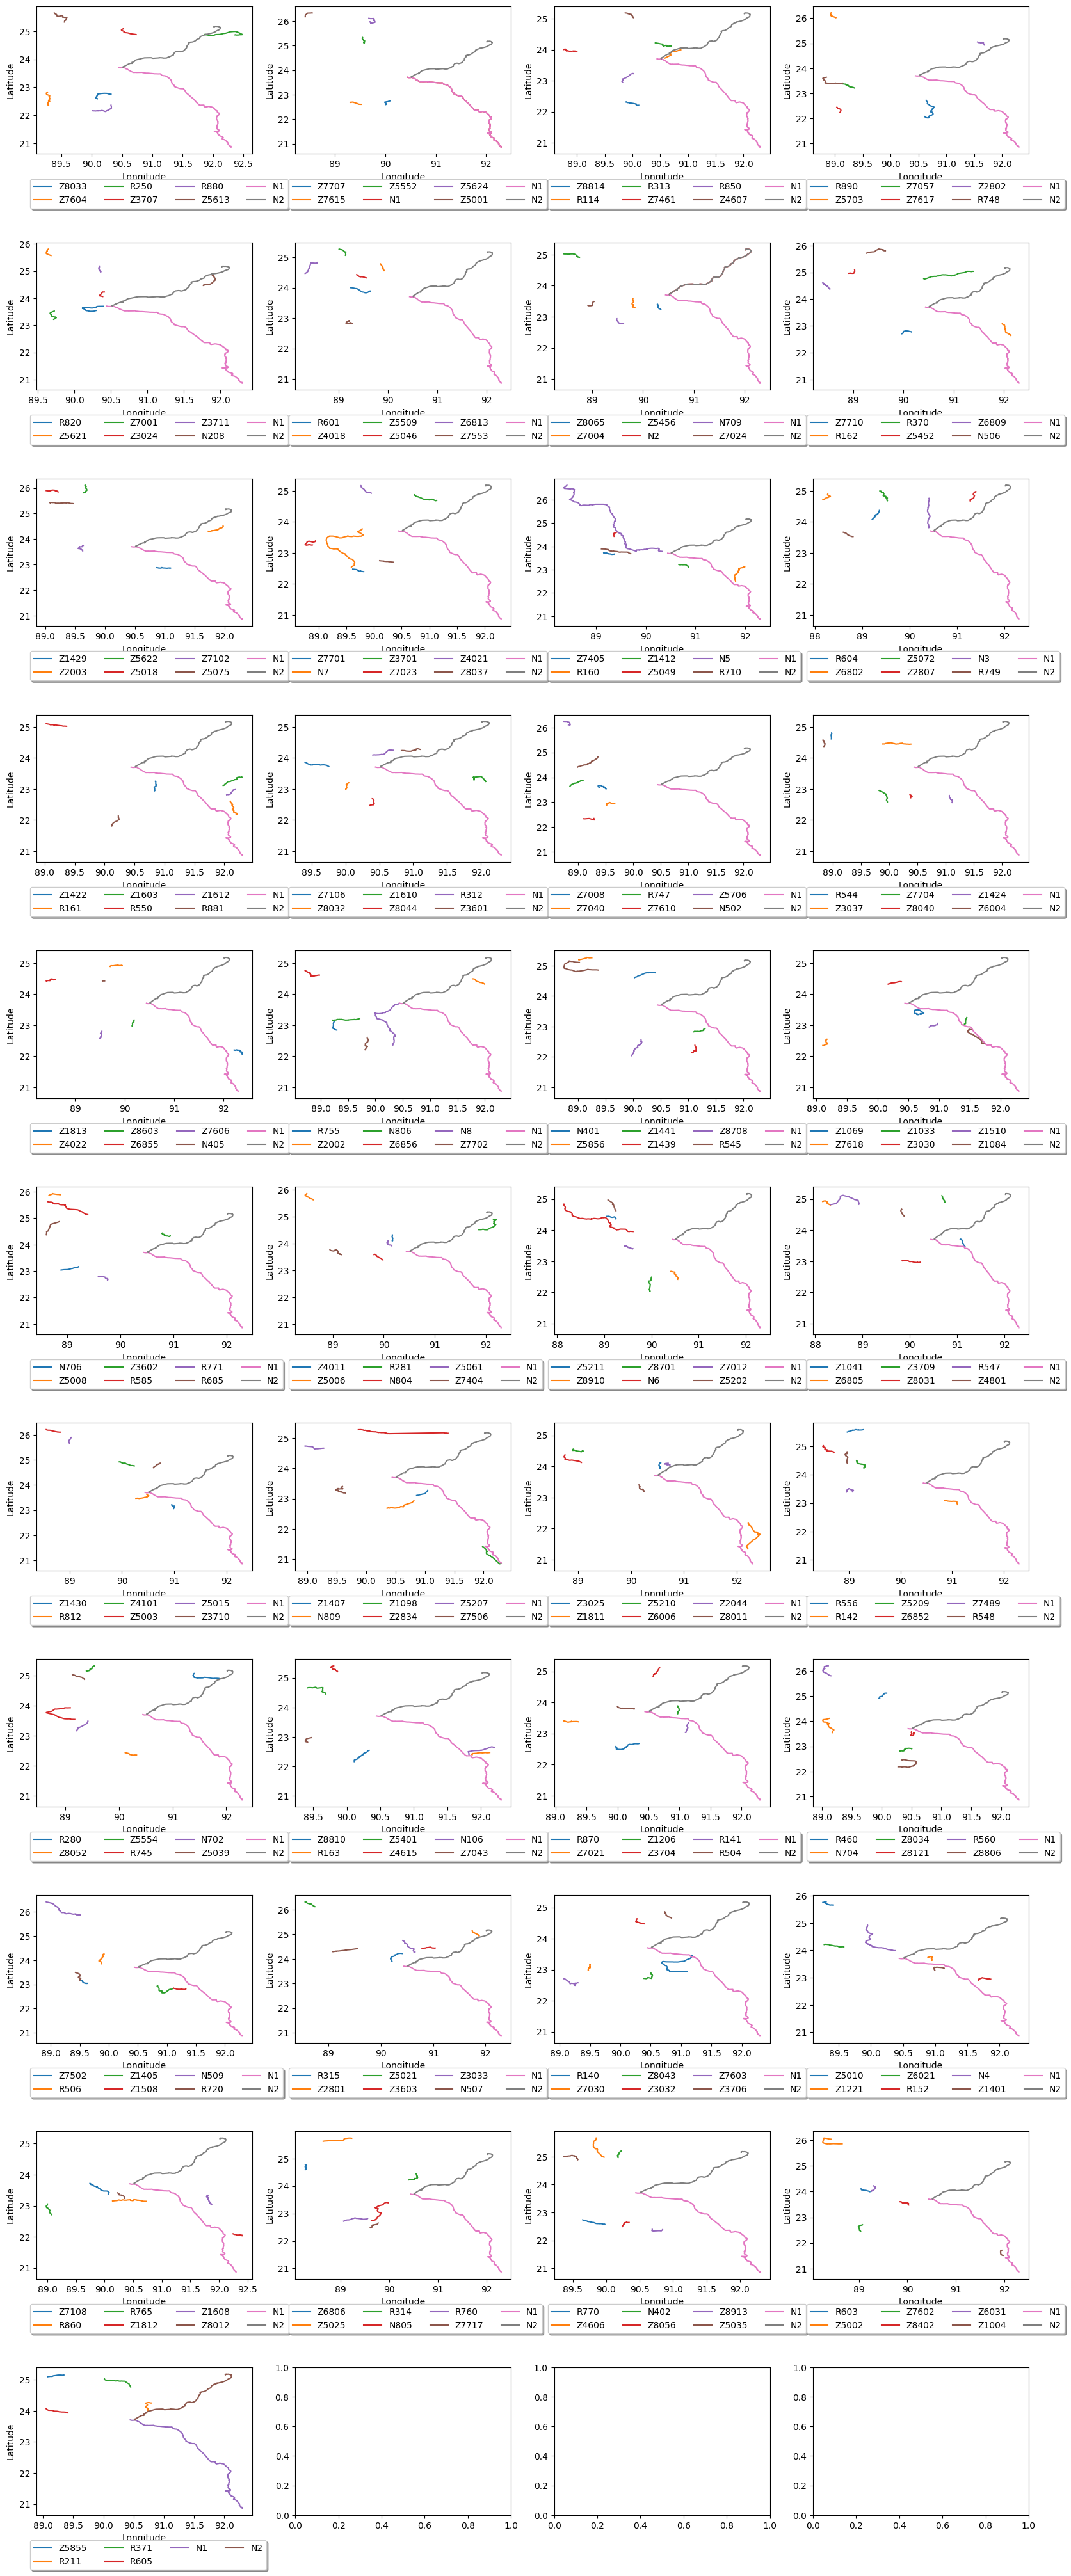

In [6]:
# Plot all of the remaining roads, six at a time, to visually inspect if there are probabable crossings left 
fig, ax = plt.subplots(11,4, figsize=(20,40))

for index, nest in enumerate(remaining_roads_nested, 1):
    plt.subplot(11, 4, index)
    plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.6, wspace=0.2)
    
    for road in nest:
        plt.plot(remaining_roads[remaining_roads['road']==road]['lon'], remaining_roads[remaining_roads['road']==road]['lat'], label=road)
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        
        
    plt.plot(remaining_roads[remaining_roads['road']=='N1']['lon'], remaining_roads[remaining_roads['road']=='N1']['lat'], label='N1')
    plt.plot(remaining_roads[remaining_roads['road']=='N2']['lon'], remaining_roads[remaining_roads['road']=='N2']['lat'], label='N2')
    plt.legend(loc="lower left", ncol=4, bbox_to_anchor=(-0.05, -0.4),
          fancybox=True, shadow=True)
plt.show()

## Identify possible crossings
After visually checking, a few roads are identified as probable and maybe crossings. These roads will be plot again to see where exactly they are located

In [7]:
# Lists are updated iteratively based on visual inspection
probable_crossings = ['N8', 'R140', 'N106', 'Z1084', 'R250', 'R280', 'R114', 'N1', 'N2']

maybe_crossings = ['Z8121', 'Z3025', 'Z1508', 'Z2801', 'Z1041', 'R160', 'R313', 'R163', 'Z2802', 'Z1069', 'N5', 'Z1441', 'Z1812', 'Z1811', 'Z2044', 'R141', 'Z1004', 'Z1221', 'Z1401', 'R812', 'Z1206', 'R820', 'N3', 'Z2002', 'R152', 'N1', 'N2']

Text(0.5, 1.0, 'Probable crossings')

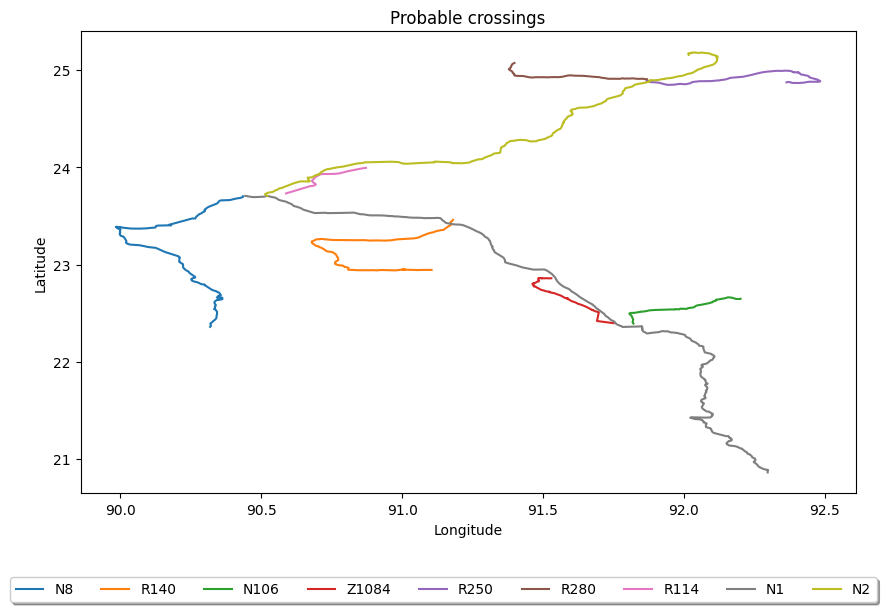

In [8]:
# Plot the probable crossings
plt.figure(figsize=(10,6)) 
for road in probable_crossings:
    plt.plot(remaining_roads[remaining_roads['road']==road]['lon'], remaining_roads[remaining_roads['road']==road]['lat'], label=road)
  
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc="lower left", ncol=len(remaining_roads.columns), bbox_to_anchor=(-0.1, -0.25),
          fancybox=True, shadow=True) 
plt.title('Probable crossings')

The seven identified probable crossings, will be added to the crossings list

Text(0.5, 1.0, 'Maybe crossings')

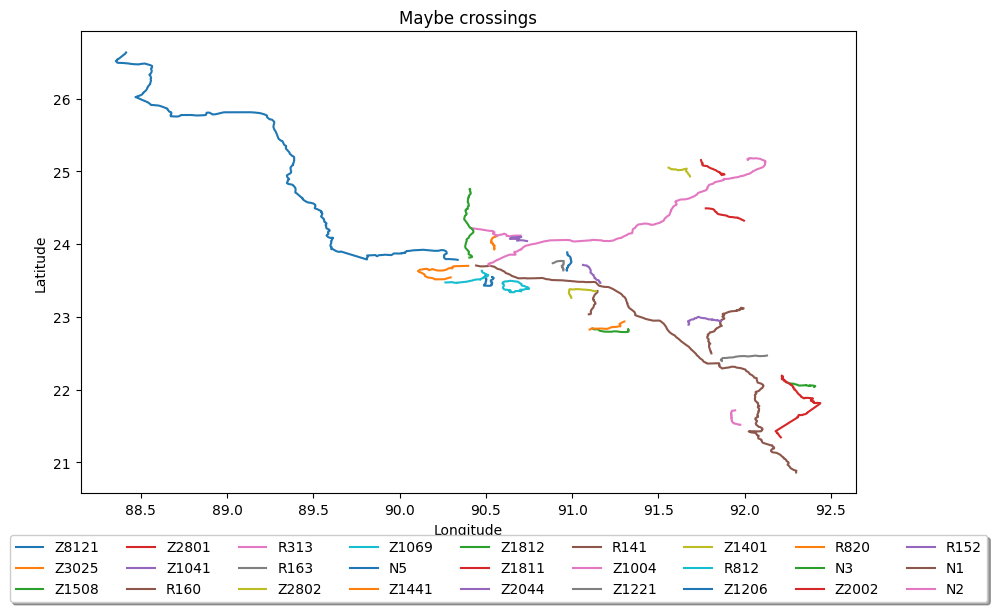

In [9]:
# Plot the maybe crossings
plt.figure(figsize=(10,6)) 
for road in maybe_crossings:
    plt.plot(remaining_roads[remaining_roads['road']==road]['lon'], remaining_roads[remaining_roads['road']==road]['lat'], label=road)
  
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc="lower left", ncol=len(remaining_roads.columns), bbox_to_anchor=(-0.1, -0.25),
          fancybox=True, shadow=True) 
plt.title('Maybe crossings')

The roads identified as maybe crossings with either the N1 or N2, will not be added to the analysis, as they are to far removed

# Identification of probable intersection points

In [10]:
roads = remaining_roads.copy()

In [11]:
# Remove the N1 and N2 from the probable crossings lists 
probable_crossings_road_to = ['N8', 'R140', 'N106', 'Z1084', 'R250', 'R280', 'R114']

In [12]:
probable_crossings_data = []
                          
# Iterate over each road_to in probable_crossings
for road_to in probable_crossings_road_to:
    n1_points = roads[roads['road'] == 'N1']
    n2_points = roads[roads['road'] == 'N2']
    
    # Filter roads DataFrame for the current road_to (smaller road)
    road_to_points = roads[roads['road'] == road_to]
    
    # Find closest points between N1 and road_to
    for index_n1, row_n1 in n1_points.iterrows():
        closest_distance = float('inf')
        closest_point_data = None
        for index_road_to, row_road_to in road_to_points.iterrows():
            distance = haversine((row_n1['lat'], row_n1['lon']), (row_road_to['lat'], row_road_to['lon']), unit=Unit.METERS)
            if distance < closest_distance:
                closest_distance = distance
                closest_point_data = row_road_to
        
        # Collecting the data for the closest pair to the list
        if closest_point_data is not None:
            probable_crossings_data.append({
                'road': row_n1['road'],
                'LRPName': row_n1['LRPName'],
                'lat': row_n1['lat'],
                'lon': row_n1['lon'],
                'chainage':row_n1['chainage'],
                'road_to': closest_point_data['road'],
                'closest_lrp': closest_point_data['LRPName'],
                'closest_lat': closest_point_data['lat'],
                'closest_lon': closest_point_data['lon'],
                'distance_to_closest': closest_distance
            })
    
    # Find closest points between N2 and road_to
    for index_n2, row_n2 in n2_points.iterrows():
        closest_distance = float('inf')
        closest_point_data = None
        for index_road_to, row_road_to in road_to_points.iterrows():
            distance = haversine((row_n2['lat'], row_n2['lon']), (row_road_to['lat'], row_road_to['lon']), unit=Unit.METERS)
            if distance < closest_distance:
                closest_distance = distance
                closest_point_data = row_road_to
        
        # Collect data for the closest pair to the list
        if closest_point_data is not None:
            probable_crossings_data.append({
                'road': row_n2['road'],
                'LRPName': row_n2['LRPName'],
                'lat': row_n2['lat'],
                'lon': row_n2['lon'],
                'chainage':row_n2['chainage'],
                'road_to': closest_point_data['road'],
                'closest_lrp': closest_point_data['LRPName'],
                'closest_lat': closest_point_data['lat'],
                'closest_lon': closest_point_data['lon'],
                'distance_to_closest': closest_distance
            })

# Convert list of to df so I can use it
probable_crossings = pd.DataFrame(probable_crossings_data)

probable_crossings

,road,LRPName,lat,lon,chainage,road_to,closest_lrp,closest_lat,closest_lon,distance_to_closest
0,N1,LRPS,23.706028,90.443333,0.000,N8,LRPS,23.702139,90.435361,919.684490
1,N1,LRPSa,23.702917,90.450417,0.814,N8,LRPS,23.702139,90.435361,1535.357404
2,N1,LRPSb,23.702778,90.450472,0.822,N8,LRPS,23.702139,90.435361,1540.210384
3,N1,LRP001,23.702139,90.451972,1.000,N8,LRPS,23.702139,90.435361,1691.298112
4,N1,LRP002,23.697889,90.460583,2.000,N8,LRPS,23.702139,90.435361,2611.209501
...,...,...,...,...,...,...,...,...,...,...
15570,N2,LRP287,25.162889,92.017110,285.938,R114,LRPE,23.994277,90.871777,174062.940193
15571,N2,LRP287a,25.161333,92.017277,286.022,R114,LRPE,23.994277,90.871777,173945.555235
15572,N2,LRP287b,25.160972,92.017333,286.060,R114,LRPE,23.994277,90.871777,173919.458751
15573,N2,LRP287c,25.159750,92.017472,286.260,R114,LRPE,23.994277,90.871777,173827.850775


In [13]:
# From all of the identified distances, only get the ones which distance is smaller than 500 meters
probable_crossings_500 = probable_crossings[probable_crossings['distance_to_closest']<500]

In [14]:
probable_crossings_500

,road,LRPName,lat,lon,chainage,road_to,closest_lrp,closest_lat,closest_lon,distance_to_closest
2428,N1,LRP094,23.419527,91.171416,91.493,R140,LRP004a,23.419166,91.172333,101.789456
2429,N1,LRP094a,23.419138,91.172194,91.583,R140,LRP004a,23.419166,91.172333,14.505865
10961,N2,LRP228,24.877110,91.872944,227.493,R250,LRP002,24.879388,91.876860,469.307508
10962,N2,LRP228a,24.877222,91.873527,227.568,R250,LRP002,24.879388,91.876860,413.648937
10963,N2,LRP228b,24.877222,91.873722,227.587,R250,LRP002,24.879388,91.876860,397.863741
10964,N2,LRP228c,24.877694,91.875277,227.756,R250,LRP002a,24.878860,91.877249,237.503563
10965,N2,LRP229,24.877849,91.875574,227.793,R250,LRP002a,24.878860,91.877249,203.014909
10966,N2,LRP229a,24.878666,91.877138,227.988,R250,LRP002a,24.878860,91.877249,24.348922
10967,N2,LRP229b,24.880194,91.878249,228.186,R250,LRP002,24.879388,91.876860,166.294850
10968,N2,LRP229c,24.882749,91.879694,228.504,R250,LRP001,24.881833,91.875444,440.660341


In [15]:
# Find the index of the row with the smallest distance for each set of roads
min_distances_indices = probable_crossings.groupby(['road', 'road_to'])['distance_to_closest'].idxmin()

#Only keep the index of the rows with the smallest distance
probable_crossings_filtered = probable_crossings.loc[min_distances_indices]
probable_crossings_filtered

,road,LRPName,lat,lon,chainage,road_to,closest_lrp,closest_lat,closest_lon,distance_to_closest
5016,N1,LRP245,22.364611,91.850833,241.456,N106,LRPS,22.393555,91.821583,4404.972047
0,N1,LRPS,23.706028,90.443333,0.000,N8,LRPS,23.702139,90.435361,919.684490
13378,N1,LRP012c,23.690416,90.546583,11.936,R114,LRPS,23.731472,90.587861,6204.920801
2429,N1,LRP094a,23.419138,91.172194,91.583,R140,LRP004a,23.419166,91.172333,14.505865
9088,N1,LRP086,23.476722,91.136444,83.829,R250,LRP002c,24.876110,91.881666,172995.294912
11142,N1,LRP009a,23.706083,90.521527,8.763,R280,LRP051,24.942583,91.400389,163809.643382
7224,N1,LRP231a,22.399611,91.757333,228.406,Z1084,LRPE,22.397583,91.750917,697.136864
6059,N2,LRP100a,24.047222,91.235861,99.585,N106,LRP063,22.663139,92.157889,180402.163447
1344,N2,LRP003,23.723666,90.513667,2.166,N8,LRPS,23.702139,90.435361,8323.711168
14767,N2,LRP037,23.922666,90.703639,36.266,R114,LRP028,23.919749,90.704778,344.363315


In [16]:
# For each identified distance smaller than 500 meters, check it that is also the sortest distance of that road, if so, drop it from the dataframe
probable_crossings_extra = probable_crossings_500.copy() 
for index in probable_crossings_extra.index:
    if index in probable_crossings_filtered.index:
        probable_crossings_extra.drop(index, inplace=True)   

probable_crossings_extra

,road,LRPName,lat,lon,chainage,road_to,closest_lrp,closest_lat,closest_lon,distance_to_closest
2428,N1,LRP094,23.419527,91.171416,91.493,R140,LRP004a,23.419166,91.172333,101.789456
10961,N2,LRP228,24.877110,91.872944,227.493,R250,LRP002,24.879388,91.876860,469.307508
10962,N2,LRP228a,24.877222,91.873527,227.568,R250,LRP002,24.879388,91.876860,413.648937
10963,N2,LRP228b,24.877222,91.873722,227.587,R250,LRP002,24.879388,91.876860,397.863741
10964,N2,LRP228c,24.877694,91.875277,227.756,R250,LRP002a,24.878860,91.877249,237.503563
10965,N2,LRP229,24.877849,91.875574,227.793,R250,LRP002a,24.878860,91.877249,203.014909
10967,N2,LRP229b,24.880194,91.878249,228.186,R250,LRP002,24.879388,91.876860,166.294850
10968,N2,LRP229c,24.882749,91.879694,228.504,R250,LRP001,24.881833,91.875444,440.660341


In [17]:
probable_crossings_trustworthy_filtered = probable_crossings_filtered[probable_crossings_filtered['distance_to_closest']<1000]

In [18]:
probable_crossings_trustworthy_filtered

,road,LRPName,lat,lon,chainage,road_to,closest_lrp,closest_lat,closest_lon,distance_to_closest
0,N1,LRPS,23.706028,90.443333,0.000,N8,LRPS,23.702139,90.435361,919.684490
2429,N1,LRP094a,23.419138,91.172194,91.583,R140,LRP004a,23.419166,91.172333,14.505865
7224,N1,LRP231a,22.399611,91.757333,228.406,Z1084,LRPE,22.397583,91.750917,697.136864
14767,N2,LRP037,23.922666,90.703639,36.266,R114,LRP028,23.919749,90.704778,344.363315
10966,N2,LRP229a,24.878666,91.877138,227.988,R250,LRP002a,24.878860,91.877249,24.348922


In [19]:
probable_crossings_trustworthy_filtered.to_csv('../data/semi-processed/probable_intersections_to_check_final.csv')

In [20]:
probable_crossings_extra.to_csv('../data/semi-processed/probable_crossings_extra.csv')

In [21]:
final_roads

NameError: name 'final_roads' is not defined

In [ ]:
final= pd.read_csv('../data/processed/cleaned_data_final.csv')
final_roads =final.road.unique().to_list()
final_roads

In [ ]:
# Plot the probable crossings
plt.figure(figsize=(10,6)) 
for road in final_roads:
    plt.plot(roads[roads['road']==road]['lon'], roads[roads['road']==road]['lat'], label=road)
  
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc="lower left", ncol=len(roads.columns), bbox_to_anchor=(-0.1, -0.25),
          fancybox=True, shadow=True) 
plt.title('Probable crossings')